# Before getting started

This tutorial uses [jupyter notebooks](), which blends text (in markdown), with python code that can be ran by installing and loading a jupyter notebook session. The session is divided into different cells, with code that can be executed and the results shown inline. 
In order to run a cell, first click on it and then press:

<kbd>⇧ Shift</kbd>+<kbd>↵ Enter</kbd>

Do it to the cell below in order to load the necessary libraries and set some display options

In [1]:
# load basic jupyter notebook libraries and namespace
%pylab inline


import pandas as pd # data manipulation
import nltk # natural language processing toolkit

pd.set_option('display.max_colwidth', -1) # fixes column width issue
plt.rcParams.update({'font.size': 14}) # customize plots

Populating the interactive namespace from numpy and matplotlib


# Why choose Python?

Python is an interpretable scripting language much like `R` that allows code to be executed line by line. It was designed to be simple, human-readable, but at the same time including more advanced software concepts like functional programming and be object-orientated.

It's also rapidly become popular and has an active community including in data science and machine learning and has quickly become the de-facto scientific software language.

![picture of python growth](https://zgab33vy595fw5zq-zippykid.netdna-ssl.com/wp-content/uploads/2017/09/growth_major_languages-1-1400x1200.png)
(image re-used from this [blog](https://stackoverflow.blog/2017/09/06/incredible-growth-python/))



## Python libraries

Python has a large range of libraries that are freely available to use

![Python libraries](https://i0.wp.com/makemeanalyst.com/wp-content/uploads/2017/09/Python-libraries-for-data-analysis.png?w=1550)

The main ones that make Python really excel at scientific computing and data science are:

* **numpy** - For array and matrix computation. Has a very similar feel to Matlab.
* **scipy** - Contains an array of methods for scientific computing, numerical integration, random variable generation etc.
* **pandas** - Creating and manipulating dataframes. Very similar in design and scope to the R library dpylr and other aspects of the tidyverse.
* **matplotlib** - Data visualisation
* **seaborn** - Built on top of matplotlib. Emulates a similar styling to ggplot2
* **bokeh** - For creating interactive visualisations
* **sci-kit-learn** - Vast machine learning library toolbox
* Deep learning libraries including:
    * **theano** - coming to end of life now, but for a time dominated deep learning computation
    * **pytorch** 
    * **tensorflow** - Google's deep learning library
    * **keras** - high level library for building neural networks

## Python cares about whitespace

One of the unique things about coming to Python from another language is that indentation and whitespace is important. This does force you to use proper indentation in your code though, which is neat. Examples of how this is done for if statements and methods (functions) are below:

In [3]:
a = 2

if a==1: # if statement ends with a colon and then on a new line needs a tab (four whitespaces).
    print('a is one')
elif a==2: # else if statement
    print('a is two')
else: # else statement
    print('a is not one or two')
# here is where an end statement would go in other languages but doesn't need to be 
# included here as the Python interpretor checks the level of the indentation instead.

a is two


In [5]:
# create a method (function)
def add_one(a): # again, need a colon followed by an indentation
    b = a + 1
    return b # what to return by the method

print('Output of method:')
print(add_one(1))

# can also create keywords with default values for methods as input
def add_one(number=1):
    '''add one to a number
    '''
    return number + 1

print(add_one())
print(add_one(2))

Output of method:
2
2
3


## Python data structure concepts

Python programs will often use lists or a dictionary to hold their data. Both have a number of associated methods. Some examples of these are included below

In [7]:
# create a list
a_list = [1,2,'apples']
print('Length of list is {}'.format(len(a_list)))

# add an object to the list
a_list.append(20)
print('Length of list is {}'.format(len(a_list)))

# reverse the list
print(a_list[1::2])

Length of list is 3
Length of list is 4
[2, 20]


In [8]:
# list all elements excluding ones that are equal to 20
[a for a in a_list if a != 20]

[1, 2, 'apples']

In [13]:
# create a dictionary. Each dictionary is a collection of key, value pairs
a_dict = { 'a':1,'b':2 }

# find an item in the dictionary using a key
print("value for 'a' is {}".format(a_dict['a']))

# assign a new key, value pair to the dictionary
a_dict['c'] = 3
a_dict['ceghghgh'] = a_dict['c'] + 4

# list all key, value pairs in dictionary (notice how for loops work in Python)
print('List of all key, value pairs for dictionary:')
for k,v in a_dict.items():
    print('{} : {}'.format(k,v))

value for 'a' is 1
List of all key, value pairs for dictionary:
a : 1
b : 2
c : 3
ceghghgh : 7


# Exploration and classification of medical text data

We will look at some example text of reported symptoms along with a given diagnosis. This is a toy dataset but provides some examples an insight on what can be done and achieved with real data. 

Our approach will be to: 
* Import the data 
* Perform extensive data exploration and data cleaning
* Separate test and train dataset
* Create a series of machine learning models by fitting to the train dataset 
* Use the test dataset to check the validation accuracy. 
  
There are many ways to perform all of these steps and some have been kept simple for the purpose of the workshop, but should hopefully serve as a guide.

Useful resources:
* See [here](https://www.kaggle.com/paultimothymooney/medical-speech-transcription-and-intent) for details on data and Kaggle competition.

* See [here](https://www.kaggle.com/paultimothymooney/medical-speech-transcription-and-intent/kernels) for inspired kernel.

* Inspired by [this blogpost](https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63) on natural language processing

* For further reading see: [A comprehensive guide to text classification](https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/)



## Load data

Our first steps will be to explore some of the text data. Here we're using a re-purposed example data set that includes descriptions of medical symptoms as well as a corresponding diagnosis/condition. This data was taken from a kaggle competition related to speech recognition (a significantly harder machine learning task) and so has a number of columns that will not be necessary for our purposes. 

We will:
* Import the data
* Display the first five entries of the dataframe
* Find the total number of rows of the dataframe
* Print ten random rows selecting only for the columns of interest
* Remove any duplicates
* create a graph to count the number of entries for each condition
* create a word cloud for all the medical symptoms and subset for each condition

In [14]:
# load data as a pandas dataframe
df = pd.read_csv('../data/overview-of-recordings.csv')

In [16]:
# show first five rows in dataframe
df.head(n=3)

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?download=1249120_43453425_58166571.wav&key=test_key_TISTK,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?download=1249120_43719934_43347848.wav&key=test_key_TISTK,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking my back,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?download=1249120_43719934_53187202.wav&key=test_key_TISTK,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353


In [20]:
# print total number of rows for data
print(len(df.index))

6661


In [21]:
# return 10 random rows from dataframe
df.sample(n=10)[['phrase','prompt']]

,phrase,prompt
4025,My foot hurts me a lot of playing football,Foot ache
5962,Hearing any loud sounds makes my ear aches,Ear ache
3300,I have a break in the skin between my thumb and index finger and it will not close.,Open wound
5750,I feel like there is something swollen and inflamed at the back of my knee.,Knee pain
3813,I'm not hearing well I have problem with my ear,Ear ache
2781,I cut my hand a couple of days ago and although I didn't think I needed it stitches it hasn't closed up.,Open wound
6626,I have a throbbing in my joints,Joint pain
1755,My knee is hurting so badly.,Joint pain
2887,I have a cut that is red and swollen.,Infected wound
1671,stiffness inability to look right or left except by moving the whole body,Neck pain


## Check to see if any phrases are duplicated

In [25]:
df.drop_duplicates(subset='phrase',inplace=True)
df = df.reset_index()

## Count of examples for each condition

In [26]:
counts = df['prompt'].value_counts()

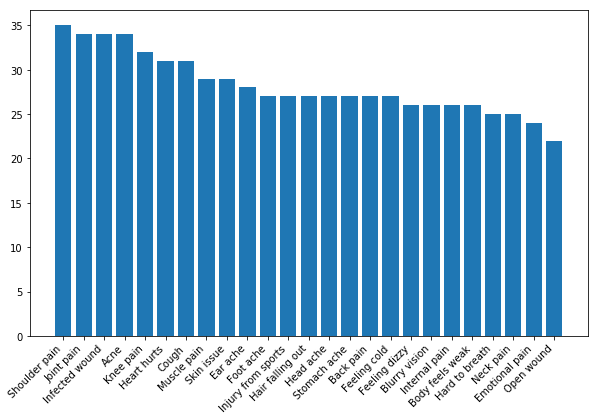

In [27]:
plt.figure(figsize=(10,6));
plt.bar(counts.index,counts.values);
plt.xticks(rotation=45,ha='right');

# Create word cloud

In [29]:
from wordcloud import WordCloud

In [30]:
# Generate a word cloud image
text = ' '.join(df['phrase'].values)
word_cloud = WordCloud(width=600,height=400,
                       max_words=150, background_color="white",
                       collocations=False).generate(text)

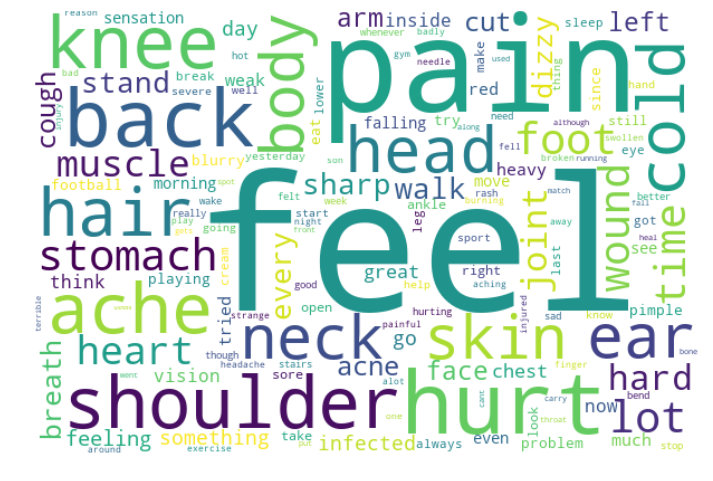

In [31]:
plt.figure(figsize=(12,10));
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis('off');

## Create class dependent worcloud

In [32]:
def create_word_cloud_from_prompt(df,prompt='Feeling cold'):
    '''Create a word cloud from a prompt
    
    '''
    text = df[df['prompt'] == prompt]['phrase'].values
    text = ' '.join(text)
    word_cloud = WordCloud(width=600,height=400,
                       max_words=150, background_color="white",
                       collocations=False).generate(text)
    plt.figure(figsize=(12,10));
    plt.imshow(word_cloud, interpolation='bilinear');
    plt.axis('off');

In [33]:
print('List of prompts: ')
print(df['prompt'].unique())

List of prompts: 
['Emotional pain' 'Hair falling out' 'Heart hurts' 'Infected wound'
 'Foot ache' 'Shoulder pain' 'Injury from sports' 'Skin issue'
 'Stomach ache' 'Knee pain' 'Joint pain' 'Hard to breath' 'Head ache'
 'Body feels weak' 'Feeling dizzy' 'Back pain' 'Open wound' 'Internal pain'
 'Blurry vision' 'Acne' 'Muscle pain' 'Neck pain' 'Cough' 'Ear ache'
 'Feeling cold']


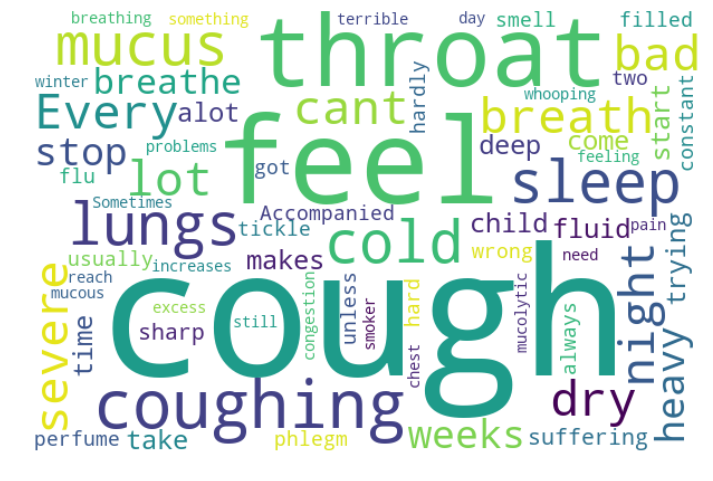

In [35]:
create_word_cloud_from_prompt(df,prompt='Cough')

# Natural Language Processing

![example image: spam filtering](https://cdn-images-1.medium.com/max/1600/1*fTPhu7PqgIbnngbWG5zFWA.gif)

Natural Language Processing or NLP is a series of tools and algorithms designed to interpet and understand text and speech. Some examples include:

* speech detection
* spam filtering
* document summarization
* document topic identification
* question and answering
* analysing sentiment of a sentence or documents

Many of these applications can be formulated as a classification problem. This is where we have some input, usually a sentence, paragraph or full document and some associated classification with it. This could be single-class and binary e.g. whether an email is spam or not spam, it could be multi-class e.g. what condition a symptom is referring to, or it could even be hierarchical and multi-class e.g. a news article could be about sport and soccer.

Python has the Natural language Toolkit (ntlk) for working with natural language data. It contains many example data and text processing tools. After installing it, all you need to do to start working with it is to import it using the following code:

```python
import nltk
```

For more of an introduction to NLP and nltk see [this article](https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63).

## Sentence tagging

One example analysis we can perform is sentence tagging. This is where we can take a sentence, break it down into its segragated components and then tag each part according to whether it's a noun, or verb etc.

We'll explore this below by taking a random sentence from our dataset and use the `nltk` library to:

* Tokenize the sentence
    * This is where the sentence is split into its separated words and punctuation
* Tag the part of speech
    * This is where each component of the sentence is assigned with a particular part of speech

In [37]:
nltk.download('punkt')
# select random sentence
sentence = df.sample(n=1)['phrase'].values[0]
# create tokens from sentence
tokens = nltk.word_tokenize(sentence)
# create tagged sentence
tagged = nltk.pos_tag(tokens)

[nltk_data] Downloading package punkt to /Users/m.irvine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
print(sentence)

I have some pain when i'm walking around my knees


In [39]:
print(tagged)

[('I', 'PRP'), ('have', 'VBP'), ('some', 'DT'), ('pain', 'NN'), ('when', 'WRB'), ('i', 'NN'), ("'m", 'VBP'), ('walking', 'VBG'), ('around', 'IN'), ('my', 'PRP$'), ('knees', 'NNS')]


In [40]:
# Check what each part-of-speech tag means
#nltk.download('tagsets')
nltk.help.upenn_tagset(tagpattern='PRP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us


There are many many other things we can do with `nltk` beyond the scope of this tutorial. For a more in-depth introduction consider looking through the [nltk tutorial](https://www.nltk.org/book/ch01.html).

## The bag of words model

A bag of words model takes a sentence and splits it into separate words. It then creates a vector where each position represents a word in a corpus and each value represents a count of the frequency of that word. It's a "bag of words" as the representation doesn't care where a word might be in the sentence, only whether it's there or not. Let's look at some example sentences:

“It was the best of times”  
“It was the worst of times”  
“It was the age of wisdom”  
“It was the age of foolishness”  

We treat each sentence as a separate document and we make a list of all words from all the four documents excluding the punctuation. We get:

* ‘It’
* ‘was’ 
* ‘the’ 
* ‘best’ 
* ‘of’
* ‘times’
* ‘worst’
* ‘age’
* ‘wisdom’ 
* ‘foolishness

The next step is the create vectors. Vectors convert text that can be used by the machine learning algorithm.
We take the first document — “It was the best of times” and we check the frequency of words from the 10 unique words.
* “it” = 1
* “was” = 1
* “the” = 1
* “best” = 1
* “of” = 1
* “times” = 1
* “worst” = 0
* “age” = 0
* “wisdom” = 0
* “foolishness” = 0

Rest of the documents will be:
“It was the best of times” = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]  
“It was the worst of times” = [1, 1, 1, 0, 1, 1, 1, 0, 0, 0]  
“It was the age of wisdom” = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]  
 “It was the age of foolishness” = [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]  

# Text classification using machine learning

For the rest of this tutorial we will be using the python library [scikit-learn (`sklearn`)](https://scikit-learn.org/stable/). This is a huge library of machine learning tools for performing classification, regression, clustering, dimensionality reduction, model selection, pre-processing, and even generating sample datasets to test algorithms on. It was designed to be simple, efficient and accessible to everyone. We will only be able to scratch the surface of some its capabilities here, but hopefully it will give an idea of what can be done.

For more introduction for this section see [this tutorial](https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63).

## Create simple bag of words model using count frequency

We'll begin using the `sklearn` package by creating a simple classifier based on the count frequency of words in a sentence. We'll also explore using the term-frequency inverse-document frequency or tf-idf, which is a statistic which weights the importance of a word within a document. For example the word *and* might be used in many sentences and so although it might have high frequency in a sentence it would have a small weighting, whereas the word *headache* might only be in a small number of sentences and so its weighting would be higher.

In this section we 
* Import some methods from `sklearn`
* Fit our data sentences using a bag of words model
* Prepare the data by splitting into a test and train dataset
* Create a data transformation and model fitting pipeline
* Check the training and validation accuracy as well as checking the precision, recall and f1-score for each class
* Check those sentences in the validation data that are given a wrong prediction to understand how the classifier may be failing

In [41]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# Step 1. Load the data
documents = df['phrase'].values

In [43]:
# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. 
# That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()




In [44]:
# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)



In [45]:
# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names).head(n=6)

,10,100,15,500m,70,abdomen,abdominal,able,about,above,...,yard,year,years,yellow,yesterday,you,young,your,zits,ït
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Preparing data and running a bag-of-word model using sci-kit learn

Adapted from this [tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html).

In [46]:
# load necessary sci-kit learn methods
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



In [47]:
# create train data and target data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# generate data
target = le.fit_transform(df['prompt'].values)
data = df['phrase'].values
classes = le.classes_

# print results
print('# of classes: {}'.format(len(classes)))
print('Fitted classes:')
print(classes)



# of classes: 25
Fitted classes:
['Acne' 'Back pain' 'Blurry vision' 'Body feels weak' 'Cough' 'Ear ache'
 'Emotional pain' 'Feeling cold' 'Feeling dizzy' 'Foot ache'
 'Hair falling out' 'Hard to breath' 'Head ache' 'Heart hurts'
 'Infected wound' 'Injury from sports' 'Internal pain' 'Joint pain'
 'Knee pain' 'Muscle pain' 'Neck pain' 'Open wound' 'Shoulder pain'
 'Skin issue' 'Stomach ache']


### create test/train split

Start by splitting data randomly between a `train` dataset that we will use for training models and a `test` dataset that we will use for validating model performance.

In [48]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.10, random_state=42)
print('Training data size: {}'.format(len(X_train)))
print('Testing data size: {}'.format(len(X_test)))

Training data size: 635
Testing data size: 71


In [49]:
def plot_comparison_classes(y_test,y_train):
    '''Plot comparison of occurances for each class between test and train
    '''
    plt.figure(figsize=(10,6));
    width = 0.35
    unique, counts = np.unique(y_test, return_counts=True)
    plt.bar(unique,counts/np.sum(counts),width,label='test');

    unique, counts = np.unique(y_train, return_counts=True)
    plt.bar(unique+width,counts/np.sum(counts),width,label='train');

    plt.xlabel('Class'); plt.ylabel('Occurance'); plt.legend();

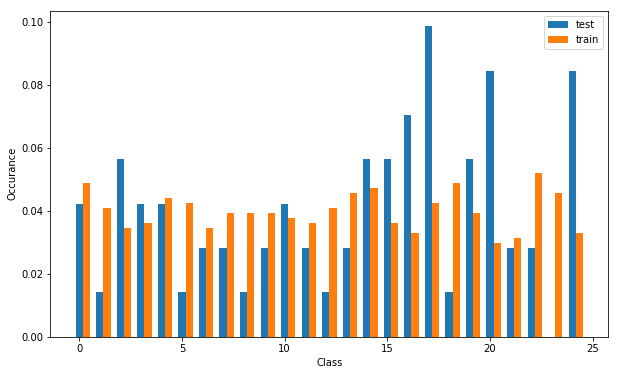

In [50]:
plot_comparison_classes(y_test,y_train)

#### Balance occurance of each class

Class imbalance between the test and training dataset can become an issue, we can fix this by stratifying along each class.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.10, stratify=target,random_state=42)
print('Training data size: {}'.format(len(X_train)))
print('Testing data size: {}'.format(len(X_test)))

Training data size: 635
Testing data size: 71


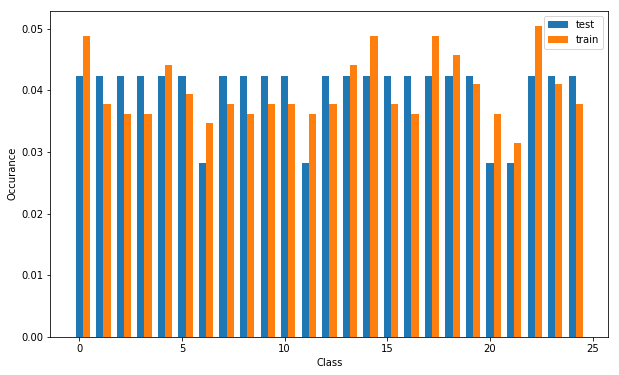

In [52]:
plot_comparison_classes(y_test,y_train)

## A brief discussion of Naive Bayes

Now we have a training and test dataset and a series of features (vectorized word counts or tf-idf), we want to create a classifier that can take these features and produce a probability of the sentence belonging to a condition (class). One way to do this is through the use of *Naive Bayes* (NB). NB tries to estimate the probability of a class $c$, given a number of features $f_i$. The conditional probability we want to calculate is therefore,

$$P(c |f_0,\ldots ,f_m)$$

The probability can be transformed via Bayes rule,

$$P(c |f_0,\ldots ,f_m) \propto P(f_0,\ldots ,f_m | c)P(c)$$

Unfortunately, we don't typically know what the probability of all the features given a particular class looks like. We can be naive about this and just assume that we can split it up so it becomes,

$$P(f_0 | c)\ldots P(f_m | c)P(c)$$

Now we just need to know the distribution for $P(f_i | c)$. One distribution that's used where we have a discrete count is the multinomial distribution. In the next section we use the multinomial NB classifier class `MultinomialNB()` to classify our text.

### Create and fit classifier

In [53]:
# The sci-kit learn Pipeline class can combine pre-processing and model fitting together.
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [57]:
# fit the training data
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [56]:
X_train[0]

'I have a pain in my stomach'

In [58]:
# predict on the validation data and calculate the accuracy
predicted = text_clf.predict(X_test)
val_acc = np.mean(predicted == y_test) 
print('Validation accuracy: {:.2%}'.format(val_acc))

Validation accuracy: 59.15%


In [59]:
def print_resampled_accuracy(predicted,y,samples=1000):
    '''Bootstrap confidence intervals for test accuracy
    '''
    from sklearn.utils import resample
    acc = []
    for _ in range(samples):
        r_p, r_y = resample(predicted, y)
        acc.append(np.mean(r_p == r_y))

    lc,m,uc = np.percentile(acc,[2.5,50.,97.5]);
    print('Accuracy : {:.2%} ({:.2%} - {:.2%})'.format(m,lc,uc))

In [60]:

predicted = text_clf.predict(X_train)
print('Training : ')
print_resampled_accuracy(predicted,y_train)

predicted = text_clf.predict(X_test)
print('Validation : ')
print_resampled_accuracy(predicted,y_test)

Training : 
Accuracy : 92.13% (90.08% - 94.17%)
Validation : 
Accuracy : 59.15% (47.89% - 69.05%)


### Evaluate the model per class

We can also evaluate how the model performs on each of the conditions in the test dataset. We can accomplish this using the precision, recall and the f1-score. The precision is the number of selected (positive) items that are relevant and the recall represents the number of relevant items that have been selected. See the following definitions:

![img](https://cdn-images-1.medium.com/max/1600/1*pOtBHai4jFd-ujaNXPilRg.png)

It might be helpful to think about some simple classifiers and what their precision and recall would look like. If we selected everything (i.e. the classifier always returned a positive for a class), then the precision would just be the proportion of positives in the whole dataset and the recall would be 1. Intuitively, this classifier is not very precise as the precision would typically be low, but it would have very high recall as it marks everything as positive. There is then a balance between precision and recall that needs to be struck.

The F1-score is a composite number of the precision and recall. It is the harmonic mean of the precision and recall and is one when a classifier is perfect (when the classifier always gets everything correct), and zero when the classifier gets everything wrong.

![img2](https://cdn-images-1.medium.com/max/1600/1*DIhRgfwTcxnXJuKr2_cRvA.png)

The precision and recall are often used in multi-class problems where there may be an imbalance between the classes. It can be easily calculated with `sklearn` by using the `classification_report` method found in the `sklearn.metrics` library

In [61]:
from sklearn.metrics import classification_report
predicted = text_clf.predict(X_test)
print(classification_report(y_test, predicted, target_names=classes))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         3
         Back pain       1.00      0.67      0.80         3
     Blurry vision       1.00      0.67      0.80         3
   Body feels weak       0.50      0.67      0.57         3
             Cough       0.67      0.67      0.67         3
          Ear ache       1.00      0.33      0.50         3
    Emotional pain       0.00      0.00      0.00         2
      Feeling cold       1.00      0.67      0.80         3
     Feeling dizzy       1.00      1.00      1.00         3
         Foot ache       1.00      0.33      0.50         3
  Hair falling out       1.00      1.00      1.00         3
    Hard to breath       0.00      0.00      0.00         2
         Head ache       0.67      0.67      0.67         3
       Heart hurts       0.40      0.67      0.50         3
    Infected wound       0.43      1.00      0.60         3
Injury from sports       0.00      0.00

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### check examples that are incorrect

In [62]:


def print_class_prediction(sentence,clf=text_clf):
    '''For a sentence and classifier, classify the sentence and then show the estimated probabilities
    for each class as a bar chart.
    '''
    probs = clf.predict_proba([sentence]).flatten()

    classes = le.classes_
    x = np.arange(len(classes))

    plt.figure(figsize=(10,6));
    plt.grid(True,axis='y');
    plt.bar(x,probs);
    plt.xticks(x,classes,rotation=45,ha='right',fontsize=14);

    ind = np.argmax(probs)
    max_prob = probs[ind]
    max_class = classes[ind]
    plt.title('Predicted condition : {}, confidence {:.2%}'.format(max_class,max_prob),fontsize=14);


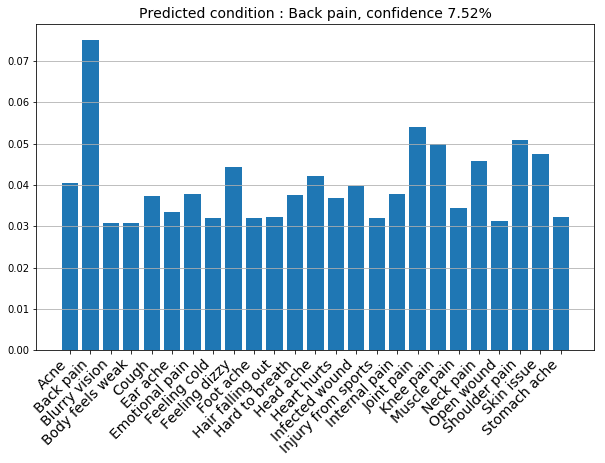

In [64]:
example_sentence = "I fell down"
print_class_prediction(example_sentence)

Sentence: 
I feel a tightness in my chest
True label: ['Hard to breath']


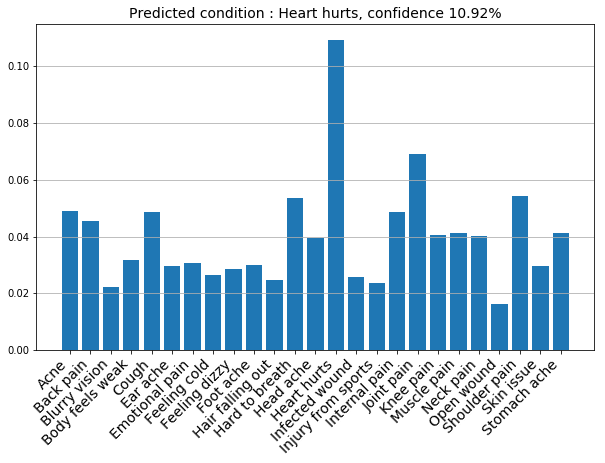

In [86]:
# Find a random incorrectly labelled sentence and check the prediciton using the print_class_prediction method
incorrect_X = X_test[predicted != y_test]
incorrect_y = y_test[predicted != y_test]

ind = np.random.randint(len(incorrect_y))
incorrrectly_labeled_sentence = incorrect_X[ind]
true_class = le.inverse_transform([incorrect_y[ind]])

print('Sentence: ')
print(incorrrectly_labeled_sentence)

print('True label: {}'.format(true_class))
print_class_prediction(incorrrectly_labeled_sentence)

## Incorporating in Lemmatization

One issue is that similar words may have similar meaning, but are being represented as something completely different in the bag of words model. For example, currently **hurt**, **hurts** and **hurting** would currently be represented differently and yet we might want them to convey the same meaning.  

There are two possible solutions to this: *stemming* and *lemmatization*. 

Stemming is a series are heuristics for removing parts of a word to leave it with something that represents the core meaning. For our example we could have a heuistic that removes an *s* or *ing* from the end of a sentence so that **hurting** and **hurts** both become **hurt**. Some example stemmers include *Lovins*, *Porter* and *Lace*. 

Lemmatization using natural language processing to try and identify the underlying meaning of the word. For example, an stemmer might convert **operative** and **operation** into the stem **operat**, however a Lemmatizer might recognize these are different and not convert them. Typically a Lemmatizer is trained on a text corpus and needs to know the part of speech for the word.

In this section we will try the following:
* Create a lemmatizer that transforms and tokenizes a sentence
* incorporate this lemmatizer into our current pipeline
* See how the new classifier performs using the analysis we've just used

In [67]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
 

In [68]:
wnl = WordNetLemmatizer()
sentence = "I have been feeling dizzy for many days."
lemma_sentence = ' '.join([wnl.lemmatize(wnl.lemmatize(t,'v'),'n') for t in word_tokenize(sentence)])

print('Original sentence:\n\t {}'.format(sentence))
print('Lemmatized sentence:\n\t {}'.format(lemma_sentence))

Original sentence:
	 I have been feeling dizzy for many days.
Lemmatized sentence:
	 I have be feel dizzy for many day .


In [69]:
# in order to incoporate the lemmatizer into the sklearn pipeline we need
# to make it into a class that has the following format. Don't worry too 
# much about the actual syntax, just note where we initialize the lemmatizer
# and where we perform the lemmatization.
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [wnl.lemmatize(wnl.lemmatize(t,'v'),'n') for t in word_tokenize(doc)]
    
text_lemma_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])



In [70]:
# fit the new classifier
text_lemma_clf.fit(X_train, y_train) 

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [71]:
# See the new accuracy on the test data
predicted = text_lemma_clf.predict(X_test)
 
print_resampled_accuracy(predicted,y_test)

Accuracy : 61.97% (50.70% - 73.24%)


In [72]:
# create a classifiction report
print(classification_report(y_test, predicted, target_names=classes))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         3
         Back pain       1.00      0.67      0.80         3
     Blurry vision       1.00      0.67      0.80         3
   Body feels weak       1.00      0.67      0.80         3
             Cough       0.50      0.67      0.57         3
          Ear ache       1.00      1.00      1.00         3
    Emotional pain       0.00      0.00      0.00         2
      Feeling cold       1.00      0.67      0.80         3
     Feeling dizzy       1.00      1.00      1.00         3
         Foot ache       1.00      0.33      0.50         3
  Hair falling out       1.00      1.00      1.00         3
    Hard to breath       0.00      0.00      0.00         2
         Head ache       0.67      0.67      0.67         3
       Heart hurts       0.40      0.67      0.50         3
    Infected wound       0.60      1.00      0.75         3
Injury from sports       0.00      0.00

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


I feel heart pain when I walk a lot


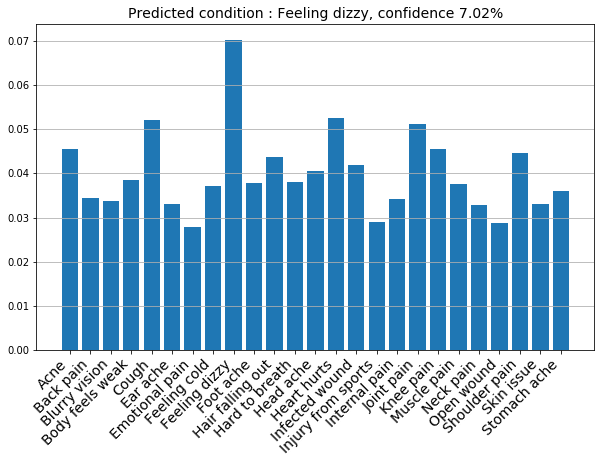

In [73]:
print(incorrrectly_labeled_sentence)
print_class_prediction(sentence,clf=text_lemma_clf)

## Random forest classifier

![https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png](https://cdn-images-1.medium.com/max/1600/1*i0o8mjFfCn-uD79-F1Cqkw.png)

([image source](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d))

Our previous classifier gave acceptable results, but maybe there's a way to improve on this by changing the way we model the features. One of the biggest drawbacks of Naive Bayes is that it assumes all features are independent of one another. In a sentence of course words can combine together to produce new meaning and we would want to take this into account. One way to do this is to construct a decision tree, for example if we come across the word head we could then ask if the word blood is present, in which case we would suspect a head injury, if it isn't present then we may suspect it's a headache. The problem is that any one single tree usually does a poor job of classifying everything. We can overcome this by creating a collection of trees or a forest. We can then ask each tree to classify the same sentence and use majority voting to decide on the class. Having a number of different trees also allows us to produce a probability for each class by seeing how many trees voted for each class.

We change our pipeline to include a random forest classifier and then follow the same procedure as before.

In [74]:
from sklearn.ensemble import RandomForestClassifier
text_rf_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer())),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier(n_estimators=1000)),
])


In [75]:
text_rf_clf.fit(X_train, y_train) 


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [76]:
print('Training data')
predicted = text_rf_clf.predict(X_train)
print_resampled_accuracy(predicted,y_train,samples=1000)

Training data
Accuracy : 99.84% (99.53% - 100.00%)


In [77]:
print('Test data')
predicted = text_rf_clf.predict(X_test)
print_resampled_accuracy(predicted,y_test,samples=1000)

Test data
Accuracy : 83.10% (73.24% - 91.55%)


In [78]:
print(classification_report(y_test, predicted, target_names=classes))

                    precision    recall  f1-score   support

              Acne       1.00      1.00      1.00         3
         Back pain       1.00      1.00      1.00         3
     Blurry vision       1.00      0.67      0.80         3
   Body feels weak       0.60      1.00      0.75         3
             Cough       0.67      0.67      0.67         3
          Ear ache       1.00      1.00      1.00         3
    Emotional pain       1.00      1.00      1.00         2
      Feeling cold       1.00      1.00      1.00         3
     Feeling dizzy       1.00      1.00      1.00         3
         Foot ache       1.00      1.00      1.00         3
  Hair falling out       0.75      1.00      0.86         3
    Hard to breath       0.00      0.00      0.00         2
         Head ache       0.75      1.00      0.86         3
       Heart hurts       1.00      1.00      1.00         3
    Infected wound       1.00      1.00      1.00         3
Injury from sports       0.50      0.33

### See prediction for random sentence

In [79]:
row = df.sample()
example_sentence = row['phrase'].values[0]
condition = row['prompt'].values[0]

is my cut infected or just healing?
True condition: Infected wound


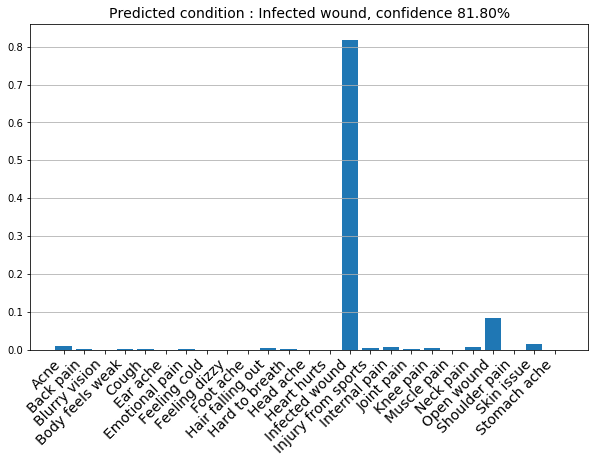

In [80]:

print(example_sentence)
print('True condition: {}'.format(condition))
print_class_prediction(example_sentence,clf=text_rf_clf)

### See prediction for incorrectly labelled sentences

Sentence: 
When I wake up in the morning I feel a soreness in my body
True label: ['Muscle pain']


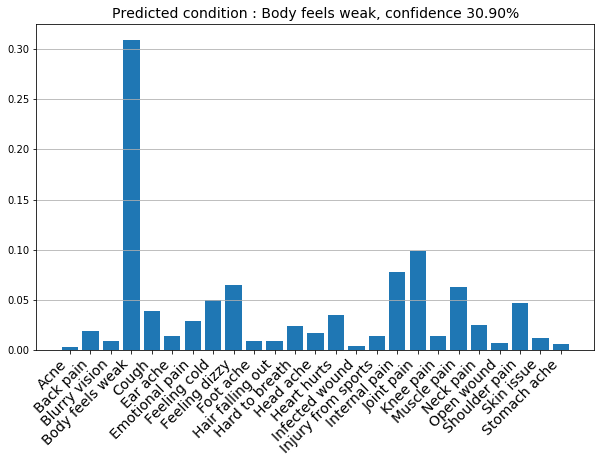

In [87]:
# get random incorrectly labelled sentence
incorrect_X = X_test[predicted != y_test]
incorrect_y = y_test[predicted != y_test]

ind = np.random.randint(0,len(incorrect_y))

incorrrectly_labeled_sentence = incorrect_X[ind]
true_class = le.inverse_transform([incorrect_y[ind]])

print('Sentence: ')
print(incorrrectly_labeled_sentence)

print('True label: {}'.format(true_class))
print_class_prediction(incorrrectly_labeled_sentence,clf=text_rf_clf)

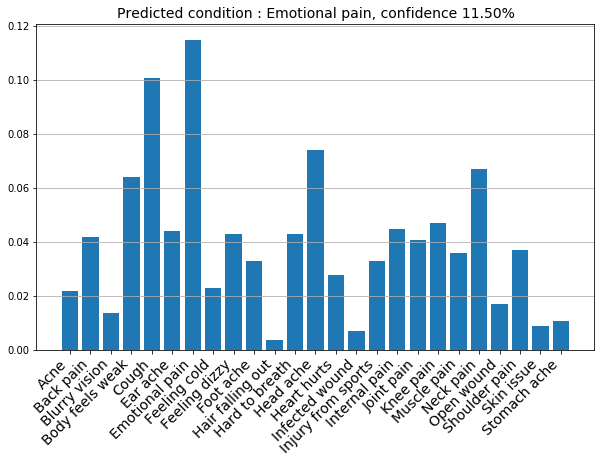

In [82]:
# predict on an example sentence
print_class_prediction("It hurts when I lie down. I can't sleep",clf=text_rf_clf)

# Unsupervised learning

## Topic modelling

Let's pretend we don't have the classes for our data. Can we still provide labels to each of symptom reports or find some way of clustering together? This type of approach is known as topic modelling and is an example of an unsupervised learning problem. We won't go into too many details on how this all works here, but provide some example code to produce some topics and find the words most associated with each topic as well as the sentences most associated with each topic

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {:d}:".format(topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))



no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(data)
tf_feature_names = tf_vectorizer.get_feature_names()

n_components = 5

# Run NMF
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

no_top_words = 10
print('NMF Topics\n----------')

display_topics(nmf, tfidf_feature_names, no_top_words)
print('\n\n\nLDA Topics\n----------')
display_topics(lda, tf_feature_names, no_top_words)

NMF Topics
----------
Topic 0:
pain stomach sharp shoulder neck joint knee muscle foot great
Topic 1:
feel like dizzy weak body stand heart chest time feels
Topic 2:
hurts heart head knee walk lot bend arm badly try
Topic 3:
hair falling lot combing shower coming lately time brush treatment
Topic 4:
cold ache ear feeling foot sleep cough night wake severe



LDA Topics
----------
Topic 0:
pain feel knee cold foot left walk lot joint breath
Topic 1:
ear face acne vision cough ache blurry pimples sleep just
Topic 2:
feel pain like hurts shoulder head stomach stand dizzy time
Topic 3:
infected cut wound inside neck red hand sore open looks
Topic 4:
hair body skin falling feels weak like morning feel lot


In [84]:
output = lda.transform(tfidf)

In [85]:
for topic in range(output.shape[1]):
    print('Topic {}:'.format(topic))
    inds = np.argsort(output[:,topic])[::-1]
    for ind in inds[:5]:
        print(data[ind])
    print('\n')

Topic 0:
I have cut my finger because of playing football and I have to apply pain relief cream but it does not help
I hve cut my finger because of playing football and I  to apply pain relief cream but it does not help
There is a sharp pain in my bicep. I have tried to apply pain relief cream but it does not help.
I feel pain in my legs muscles after I ran yesterday, I took some pain killers but it doesn't help.
I had alot of exercise yesterday so i feel sharp muscle pains


Topic 1:
I have an ear ache that won't go away.  I don't have a cold or headache or any other symptoms.  Just an earache.
My face has broken out in painful red spots and lumps, that no matter how much I clean my face don't seem to be going away.
I started taking swimming lessons and I guess I swallowed too much water through my nose, because this sinusitis is killing me now.
My nose is congested all the time and there's this gluey secretion in my throat that makes it impossible for me to sleep. I often have to nap